In [1]:
import numpy as np
import heapq
import matplotlib.pyplot as plt

def knnSearch(collection, query, k):
    def euclidean_distance(x, y):
        return np.sqrt(np.sum((x - y) ** 2))
    heap = []
    for i in range(len(collection)):
        distance = euclidean_distance(collection[i], query)
        heapq.heappush(heap, (-distance, i))
        if len(heap) > k:
            heapq.heappop(heap)
    return [(i, -d) for d, i in heap]

In [3]:
import time
import pandas as pd
import rtree

Ds = [pow(2, i) for i in [1, 2, 3, 4, 5]]
Ns = [pow(10, i) for i in [2, 3, 4, 5]]

tiempos = {}
tiempos2 = {}
for D in Ds: 
    tiempos["D="+str(D)] = list()
    tiempos2["D="+str(D)] = list()
for N in Ns:
    for D in Ds:  
        # establecer propiedades del indice              
        prop = rtree.index.Property()
        prop.dimension = D    # dimension del vector caracteristico
        prop.buffering_capacity = 8    # Cantidad maxima de MBRs en un nodo 
        ind = rtree.index.Index(properties = prop)
        # Generar los datos    
        data = np.random.sample((N,D))
        # insertar los puntos                
        for i in range(data.shape[0]):
            ind.insert(i, data[i])    
        
        query = data[0]        
       
        # aplicar la consulta indexada                   
        start_time = time.time()                
        ind.nearest(query, num_results=2)
        tiempos["D="+str(D)].append(round(time.time() - start_time, 4))

        # aplicar la consulta lineal
        start_time = time.time()                
        knnSearch(data, query, k=2);
        tiempos2["D="+str(D)].append(round(time.time() - start_time, 4))

        ind.close()

        D=2    D=4    D=8    D=16    D=32
100     0.0  0.000  0.000  0.0016  0.0010
1000    0.0  0.000  0.001  0.0010  0.0010
10000   0.0  0.001  0.000  0.0110  0.0135
100000  0.0  0.000  0.003  0.0347  0.2227
           D=2     D=4     D=8    D=16    D=32
100     0.0010  0.0010  0.0010  0.0009  0.0000
1000    0.0070  0.0099  0.0126  0.0061  0.0061
10000   0.0667  0.0724  0.0669  0.0690  0.0658
100000  0.6416  0.6418  0.6412  0.6512  0.6644


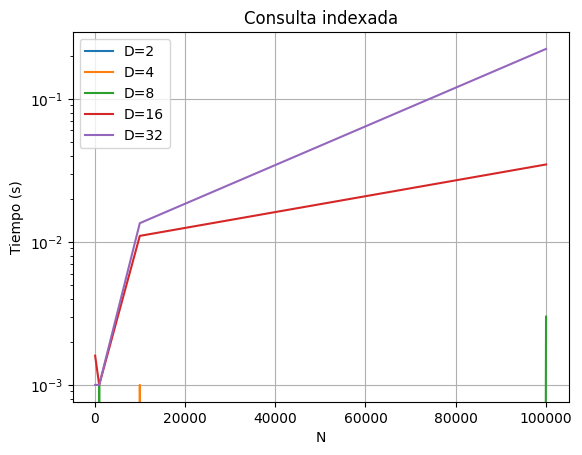

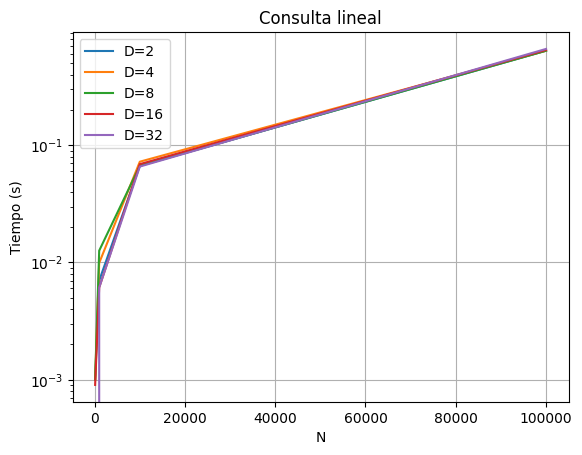

In [4]:
results = pd.DataFrame.from_dict(tiempos)
results.index = Ns
print(results)

results2 = pd.DataFrame.from_dict(tiempos2)
results2.index = Ns
print(results2)

results.plot(logy = True)
plt.xlabel('N')
plt.ylabel('Tiempo (s)')
plt.title('Consulta indexada')
plt.grid()
plt.show()

results.to_csv('results.csv')

results2.plot(logy = True)
plt.xlabel('N')
plt.ylabel('Tiempo (s)')
plt.title('Consulta lineal')
plt.grid()
plt.show()

results2.to_csv('results2.csv')

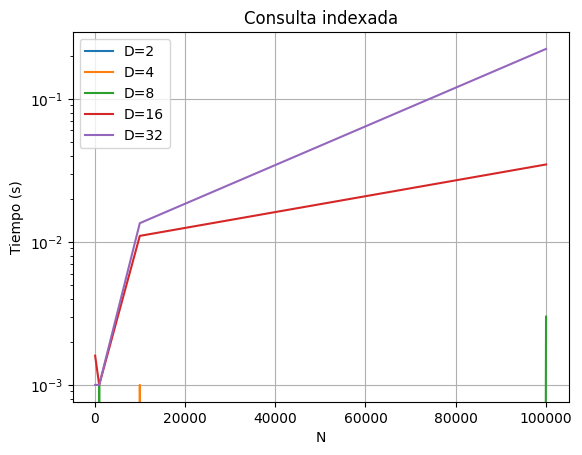

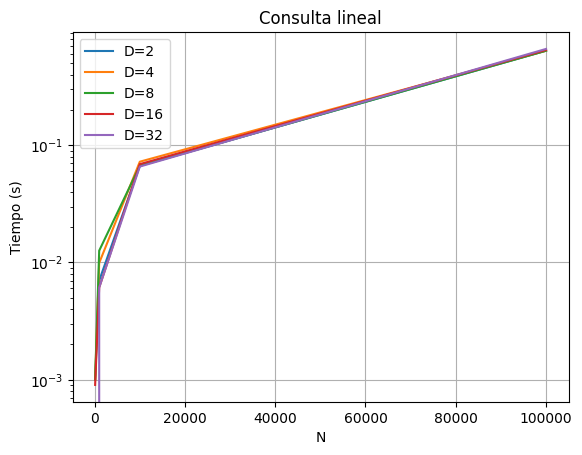

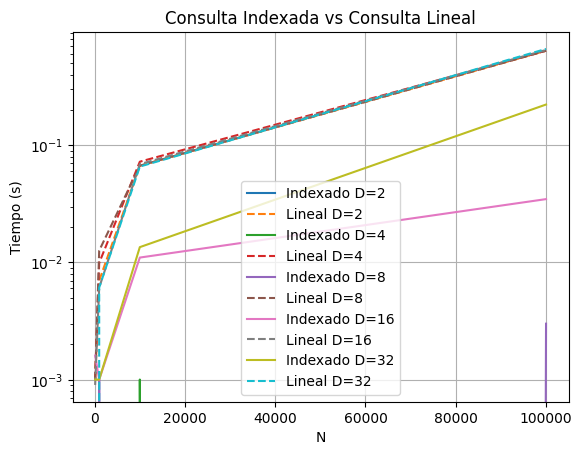

In [5]:
results = pd.DataFrame.from_dict(tiempos)
results.index = Ns

results2 = pd.DataFrame.from_dict(tiempos2)
results2.index = Ns

# Graficamos cada DataFrame por separado.
results.plot(logy=True)
plt.xlabel('N')
plt.ylabel('Tiempo (s)')
plt.title('Consulta indexada')
plt.grid()
plt.show()

results2.plot(logy=True)
plt.xlabel('N')
plt.ylabel('Tiempo (s)')
plt.title('Consulta lineal')
plt.grid()
plt.show()

# Guardamos los resultados en archivos CSV.
results.to_csv('results.csv')
results2.to_csv('results2.csv')

# Combinamos los DataFrames para crear un gráfico comparativo.
combined = pd.concat([results, results2], axis=1, keys=['Indexado', 'Lineal'])
combined.columns = [f'{col[0]}_{col[1]}' for col in combined.columns]

# Graficamos el resultado combinado.
for d in [2, 4, 8, 16, 32]:
    plt.plot(combined.index, combined[f'Indexado_D={d}'], label=f'Indexado D={d}')
    plt.plot(combined.index, combined[f'Lineal_D={d}'], label=f'Lineal D={d}', linestyle='--')

plt.xlabel('N')
plt.ylabel('Tiempo (s)')
plt.title('Consulta Indexada vs Consulta Lineal')
plt.legend()
plt.grid()
plt.yscale('log')
plt.show()